# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №2. Детектирование букв. </center>

Вам дано два датасета: train.csv и test.csv. Каждая строчка в файлах - это одна картинка с буквой, в строчке 785 элементов, первый элемент - класс, все остальные - картинка 28х28:

In [0]:
import pandas as pd
#train = pd.read_csv("train.csv", header=None)

In [0]:
from google.colab import files
#uploaded = files.upload()
import io
#test = pd.read_csv(io.BytesIO(uploaded['test.csv']), header=None)
test = pd.read_csv('test.csv', header=None)

In [0]:
from google.colab import files
#uploaded = files.upload()
import io
#train =  pd.read_csv(io.BytesIO(uploaded['train.csv']), header=None)
train = pd.read_csv('train.csv', header=None)

In [4]:
import numpy as np
train = np.asarray(train)
test = np.asarray(test)
first_pic = train[8]
pic_label, pic = first_pic[0], first_pic[1:]
print(pic_label)

7


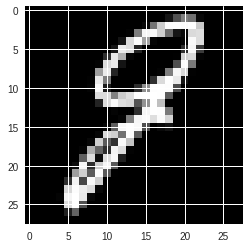

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(pic.reshape((28, 28)).T, cmap='gray')
plt.show()

a, b, c, d, e, f, g - 7ая буква английского алфавита. 

## Задание

1) Создать модель нейронной сети, которая предсказывает букву по картинке. Модель обучать на данных из train.csv, качество модели проверять на данных из файла test.csv. Для построения модели желательно использовать библиотеки tensorflow и keras.
    1. Обязательно : построить модели с 2мя и 3мя скрытыми слоями, количество нейронов в слоях подобрать таким, какое вы считаете необходимым (по результатам обучения). 
    2. Объяснить выбор оптимальных параметров нейронной сети - количество и состав слоёв, нейронов на каждом слое, функций активации и других параметров. (3 балла за пункты 1-2)
    3. По желанию: попробовать другие возможные архитектуры (большее/меньшее количество слоёв, нейронов, свёрточные слои) с объяснением выбора и указанием получившихся результатов качества модели. Выбрать наилучшую модель. (1-2 балла)
2) Для наилучшей модели построить матрицу смежности (confusion_matrix) результатов предсказаний модели на тестовых данных (2 балла):
    1. Найти 10 пар букв, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
    2. Насколько равномерно обучилась ваша модель, а именно все ли буквы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также буквы с самым лучшим и с самым худшим процентом детекции (точностью детекции).
    3. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?
3) Оценка качества:
    - >0.85    +1 балл
    - >0.95    +2 балла
    - >0.99    +3 балла
4) Творческое задание (3 балла). Написать на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5и букв в целом с повторениями, но должно быть 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографировать букву и привести её картинку к размеру 28х28 и чёрно-белой палитре цветов. Сделать предсказание буквы вашей моделью. Получилось? :)
    - В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
    - Помните, что буква должна быть белого цвета, а фон - чёрного. Или другими словами, картинка должна в итоге представлять из себя 784 значения от 0 до 255 (целых) или от 0 до 1 (если вы приводите весь датасет к такому виду).
    - Также важно, что в исходном датасете все картинки транспонированы (см. 3 часть кода выше, 2ую строчку), а значит для корректной детекции надо транспонировать картинку, перед тем как делать функцию reshape. Либо надо перед обучением транспонировать все картинки, чтобы правильно посылать их на обучение.
    - Описание ваших действий по выполнению этого задания (что вы использовали чтобы привести картинку к нужному виду) полностью приветствуется преподавателями :)

In [0]:
import tensorflow as tf
from tensorflow import keras

In [7]:
print(tf.__version__)

1.12.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')

In [9]:
test.shape

(13000, 785)

In [0]:
train_labels = list()
for elem in train:
  train_labels.append(elem[0])
  
train_labels = np.asarray(train_labels)

train_images = list()
for elem in train:
  train_images.append(elem[1:])
  
train_images = np.asarray(train_images)
train_images = train_images.reshape(65000, 28, 28)

#Now for test data
test_labels = list()
for elem in test:
  test_labels.append(elem[0])
  
test_labels = np.asarray(test_labels)

test_images = list()
for elem in test:
  test_images.append(elem[1:]) #Take all except 0 elem
  
test_images = np.asarray(test_images)
test_images = test_images.reshape(13000, 28, 28)

In [11]:
train_labels

array([ 5, 25,  1, ...,  4,  7, 21])

In [12]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 5, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
np.unique(train_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
        2500, 2500, 2500, 2500]))

In [14]:
np.unique(test_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))

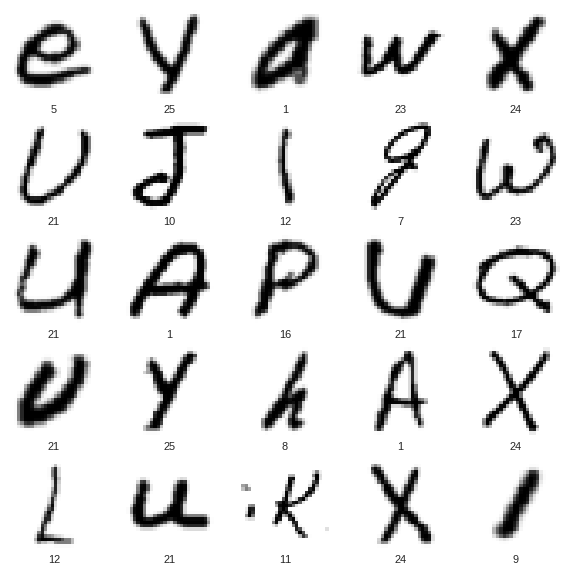

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].T, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.grid(False)

plt.show()

In [0]:
#Переведем значения в шкалу от 0 до 1:
train_images = train_images / 255.0
test_images = test_images / 255.0

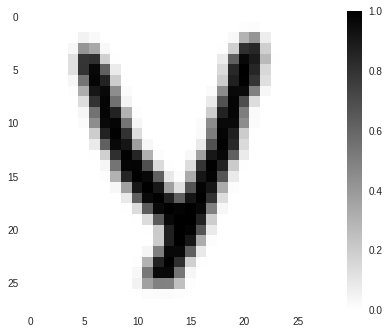

In [17]:
plt.figure()
plt.imshow(train_images[1].T, cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

Начнем с построения однослойной сети без скрытых слоев

In [0]:
linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # перевод данных в вектор 
    #размерности 28*28=784 (построчно)
    keras.layers.Dense(27, activation=tf.nn.softmax) # 27 - число классов
])

In [0]:
linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [20]:
linear_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
65000/65000 [==============================] - 3s 41us/step - loss: 1.8984 - acc: 0.5152
Epoch 2/10
65000/65000 [==============================] - 3s 44us/step - loss: 1.3584 - acc: 0.6261
Epoch 3/10
65000/65000 [==============================] - 3s 44us/step - loss: 1.2512 - acc: 0.6501
Epoch 4/10
65000/65000 [==============================] - 3s 44us/step - loss: 1.1968 - acc: 0.6635
Epoch 5/10
65000/65000 [==============================] - 3s 43us/step - loss: 1.1626 - acc: 0.6754
Epoch 6/10
65000/65000 [==============================] - 3s 39us/step - loss: 1.1386 - acc: 0.6819
Epoch 7/10
65000/65000 [==============================] - 3s 39us/step - loss: 1.1206 - acc: 0.6866
Epoch 8/10
65000/65000 [==============================] - 3s 39us/step - loss: 1.1065 - acc: 0.6907
Epoch 9/10
65000/65000 [==============================] - 3s 39us/step - loss: 1.0951 - acc: 0.6942
Epoch 10/10
65000/65000 [==============================] - 3s 39us/step - loss: 1.0853 - acc: 0.6959

In [21]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)

13000/13000 [==============================] - 0s 24us/step


In [22]:
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Test accuracy: 0.6867692307692308 
Test loss: 1.105703591786898


Мы можем свернуть вектор весов в картинку  28×28  и провизуализировать:

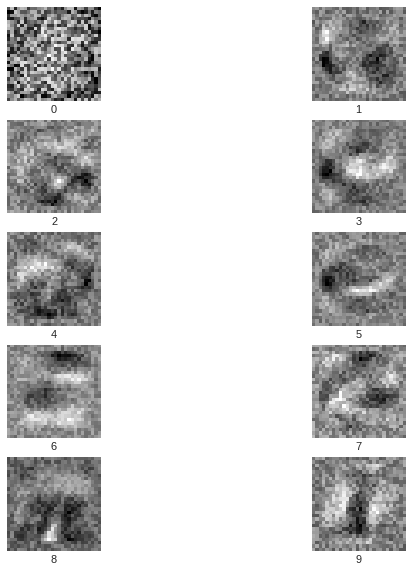

In [23]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)).T * -1, cmap='gray')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

In [0]:
#plot_cm = files.upload()

In [0]:
from sklearn import metrics

#from plot_cm import plot_confusion_matrix

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

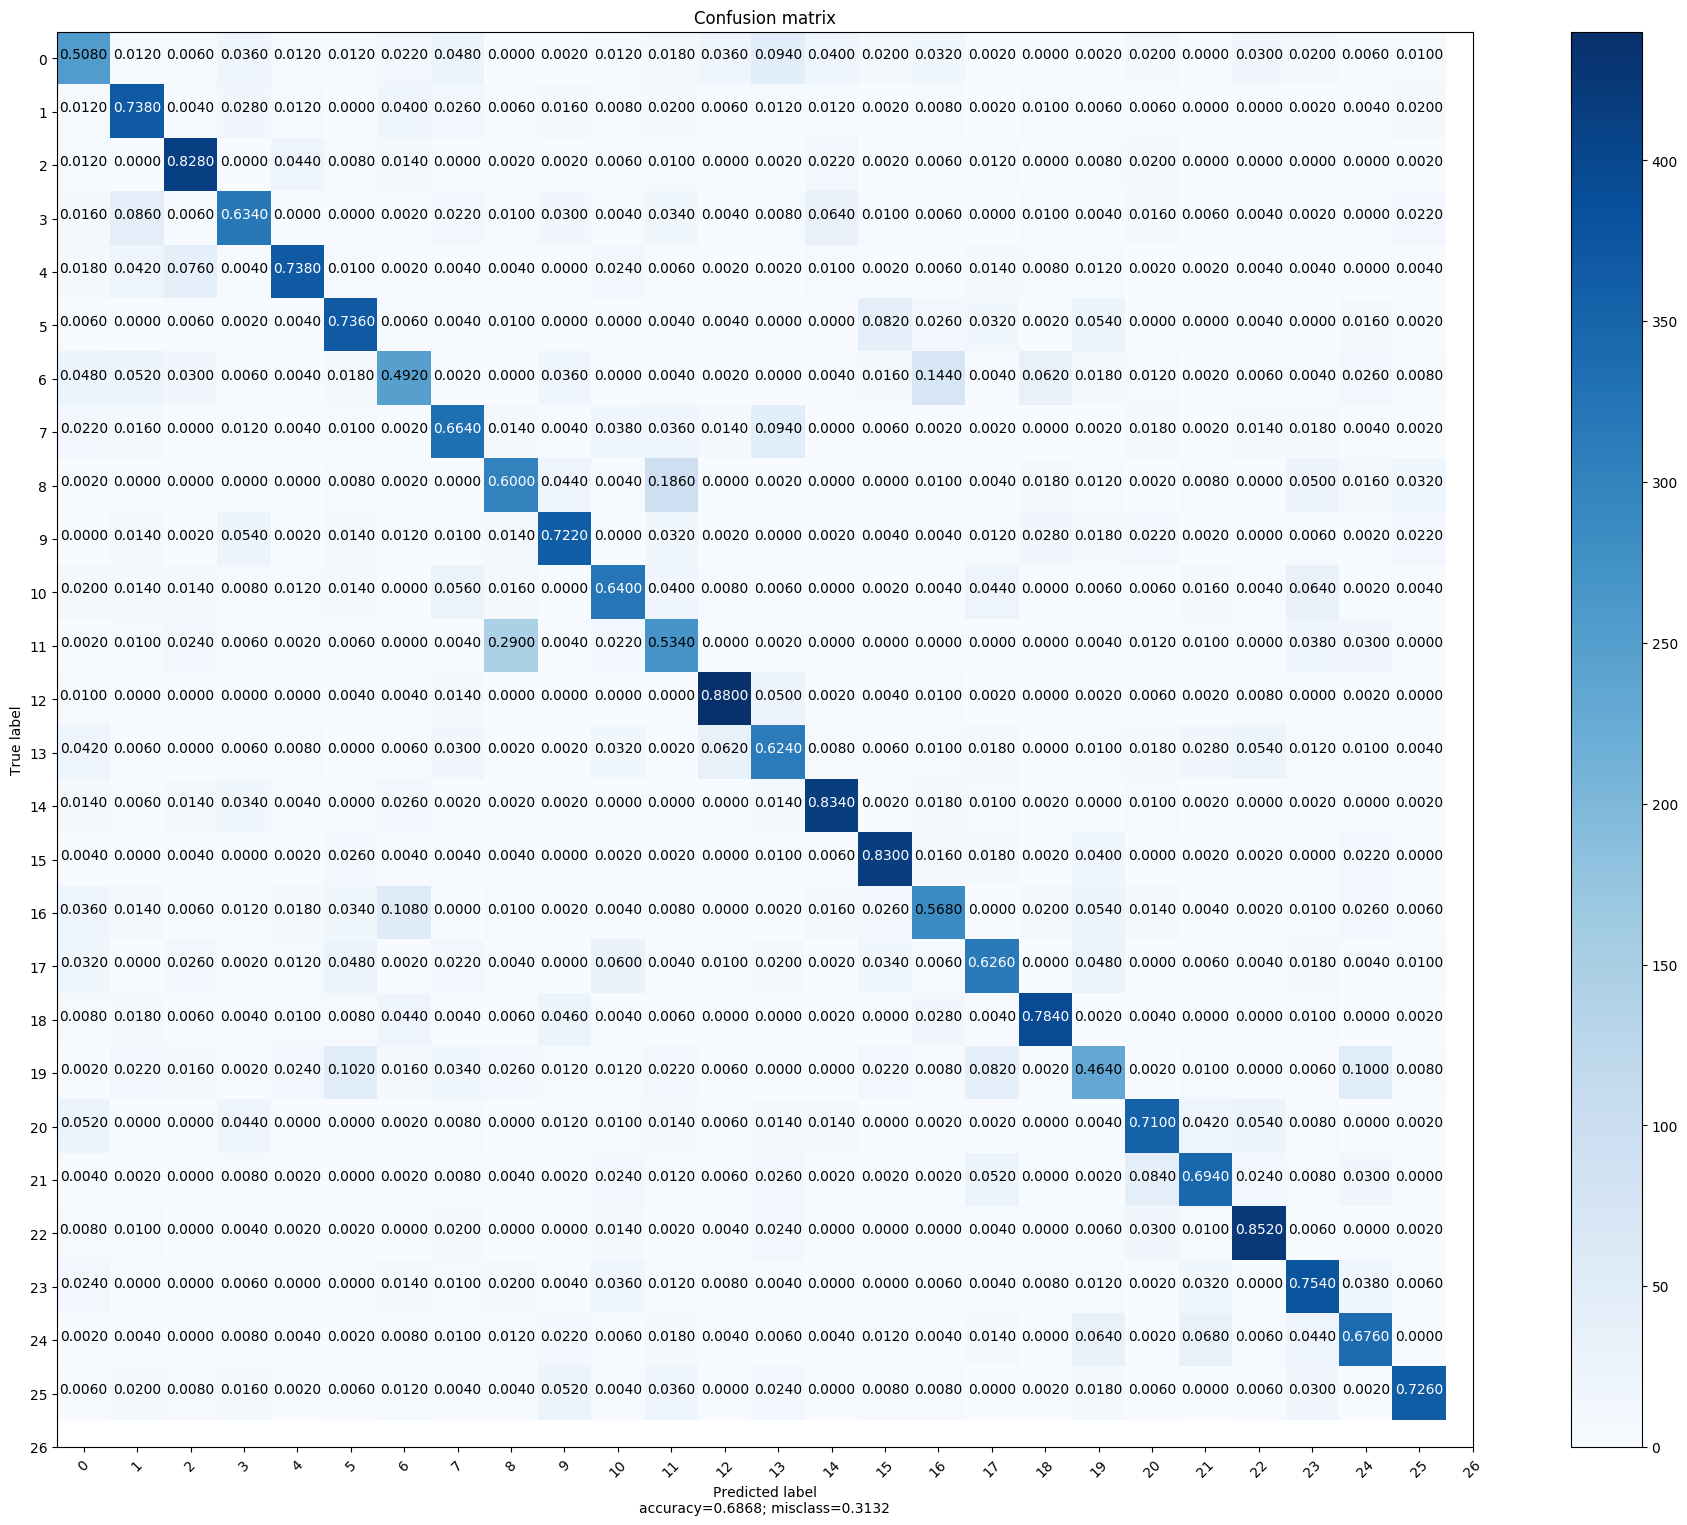

In [27]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 27),
                      normalize=True)

In [28]:
%%time 

linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # перевод данных в вектор размерности 28*28=784 (построчно)
    keras.layers.Dense(27, activation=tf.nn.softmax) # 27 - число классов
])

linear_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(train_images, train_labels, epochs=100, verbose=0)

CPU times: user 5min 9s, sys: 12.1 s, total: 5min 21s
Wall time: 3min 48s


In [29]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)



13000/13000 [==============================] - 0s 25us/step
Test accuracy: 0.7091538461538461 
Test loss: 1.0316624824817364


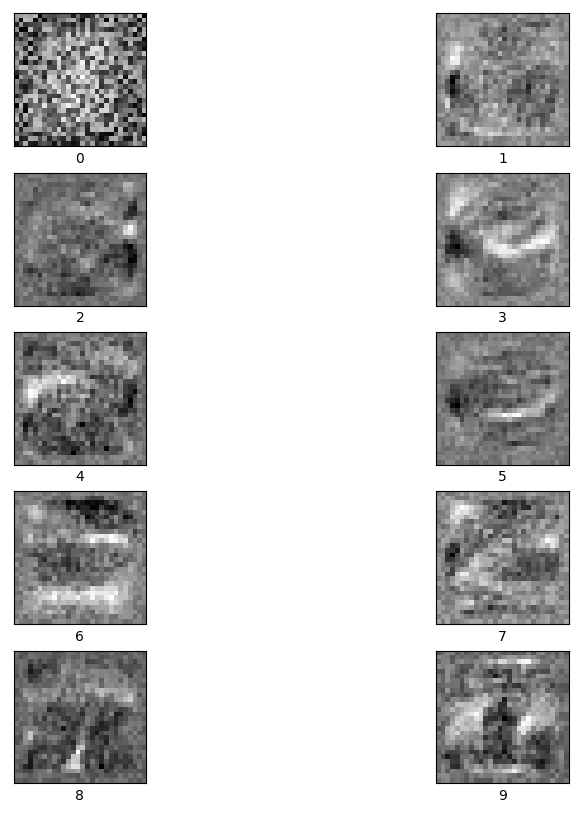

In [30]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)).T, cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

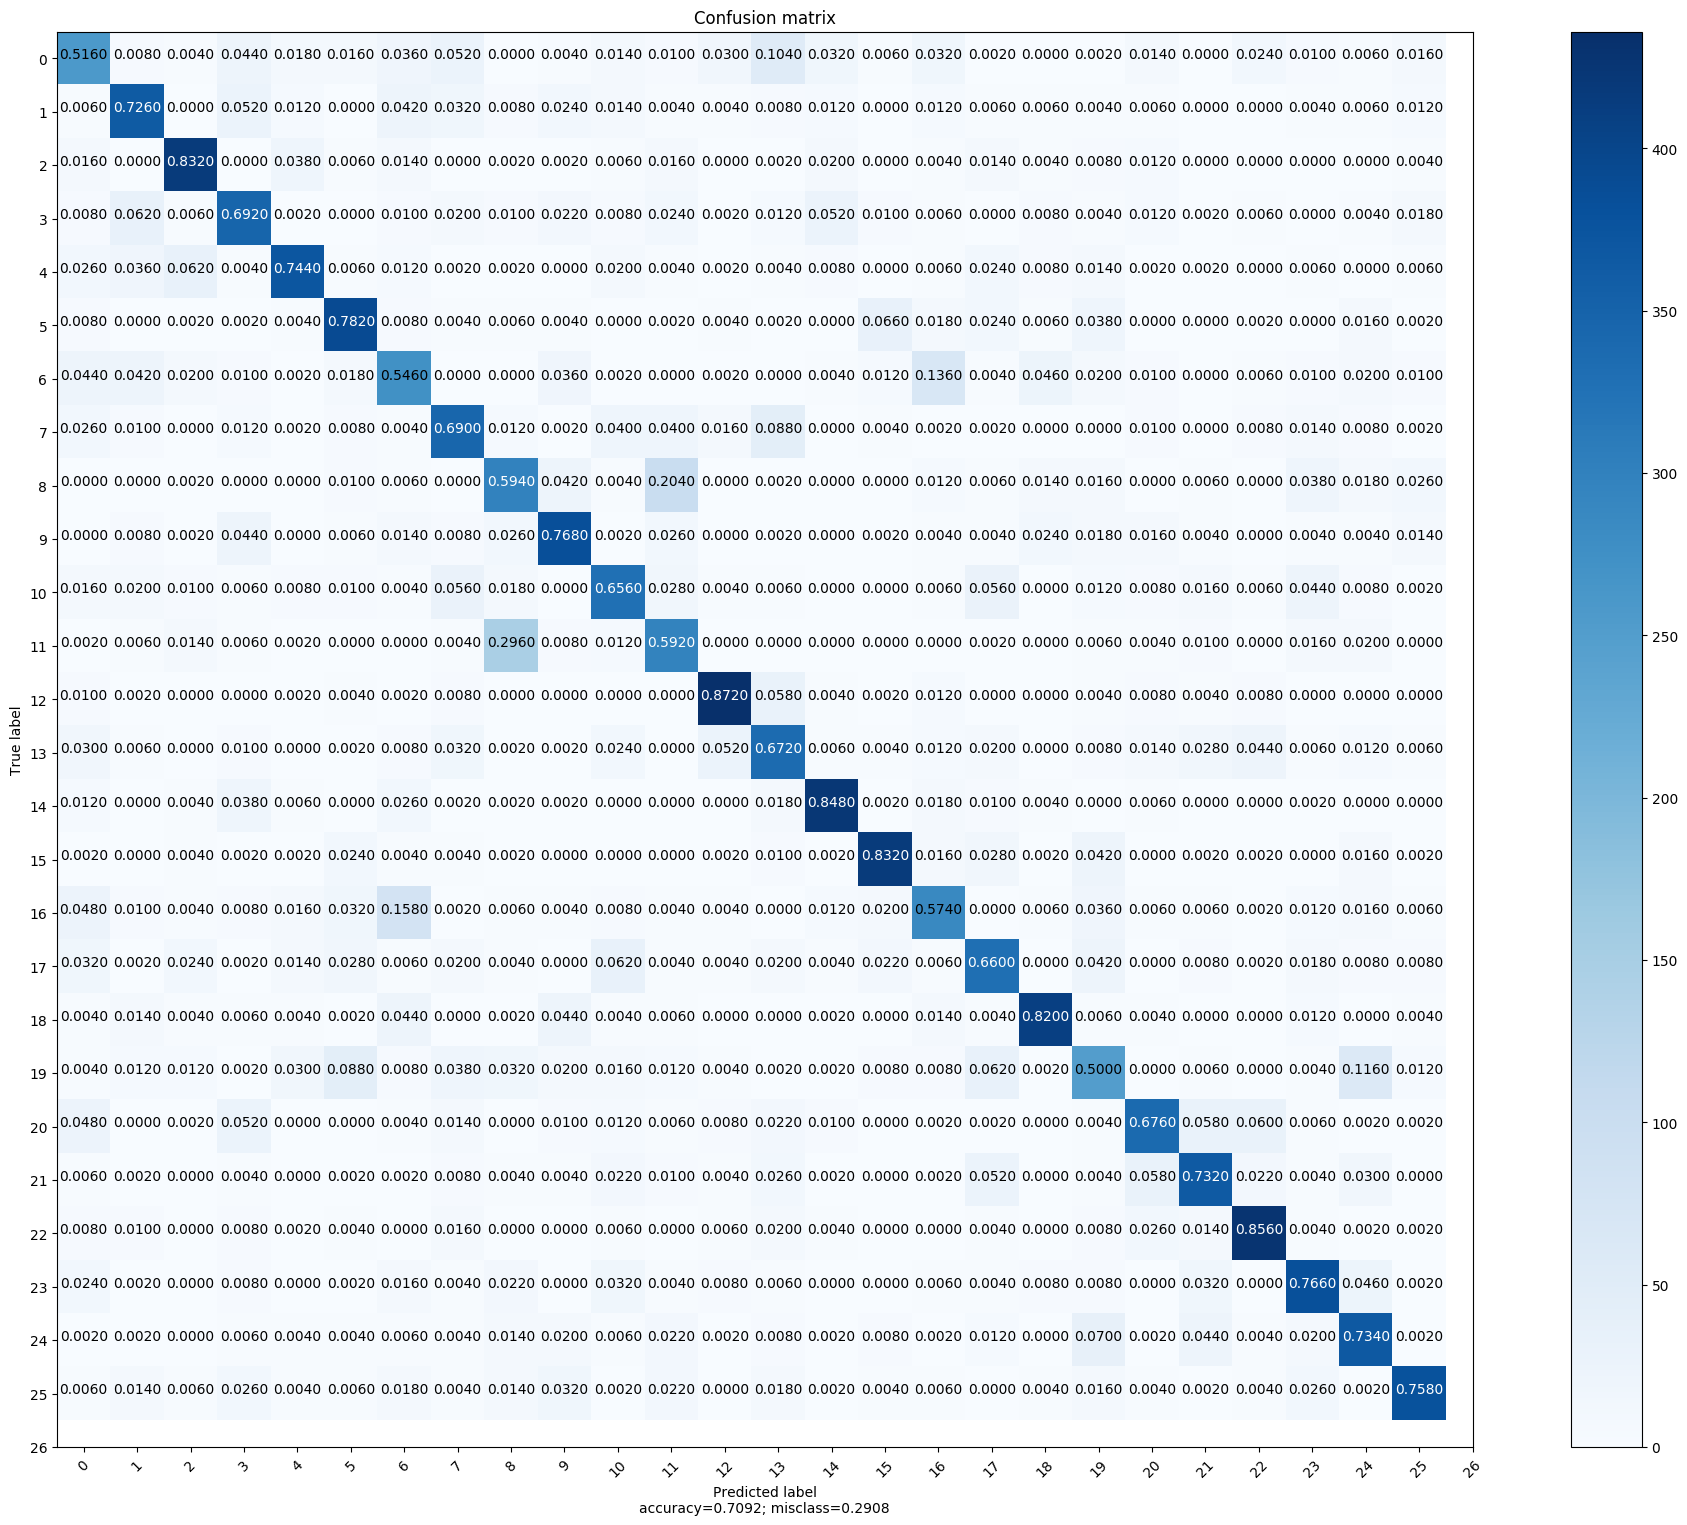

In [31]:
style.use('default')
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 27),
                      normalize=True)

Перейдем к созданию многослойной нейросети.
Добавим один скрытый слой из 100 нейронов в модель




In [0]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(28, 28))) # перевод данных в вектор размерности 28*28=784 (построчно)

linear_model.add(keras.layers.Dense(100)) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Activation('relu')) # функция активации 

linear_model.add(keras.layers.Dense(27, activation=tf.nn.softmax)) # 27 - число классов

In [0]:
linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [34]:
linear_model.fit(train_images, train_labels, epochs=10, verbose=0)

In [35]:
test_loss, test_acc = linear_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 0s 32us/step
Test accuracy: 0.8161538461538461 
Test loss: 0.6412181143760681


Test accuracy: 0.8161538461538461 
Test loss: 0.6412181143760681

In [36]:
len(linear_model.layers)

4

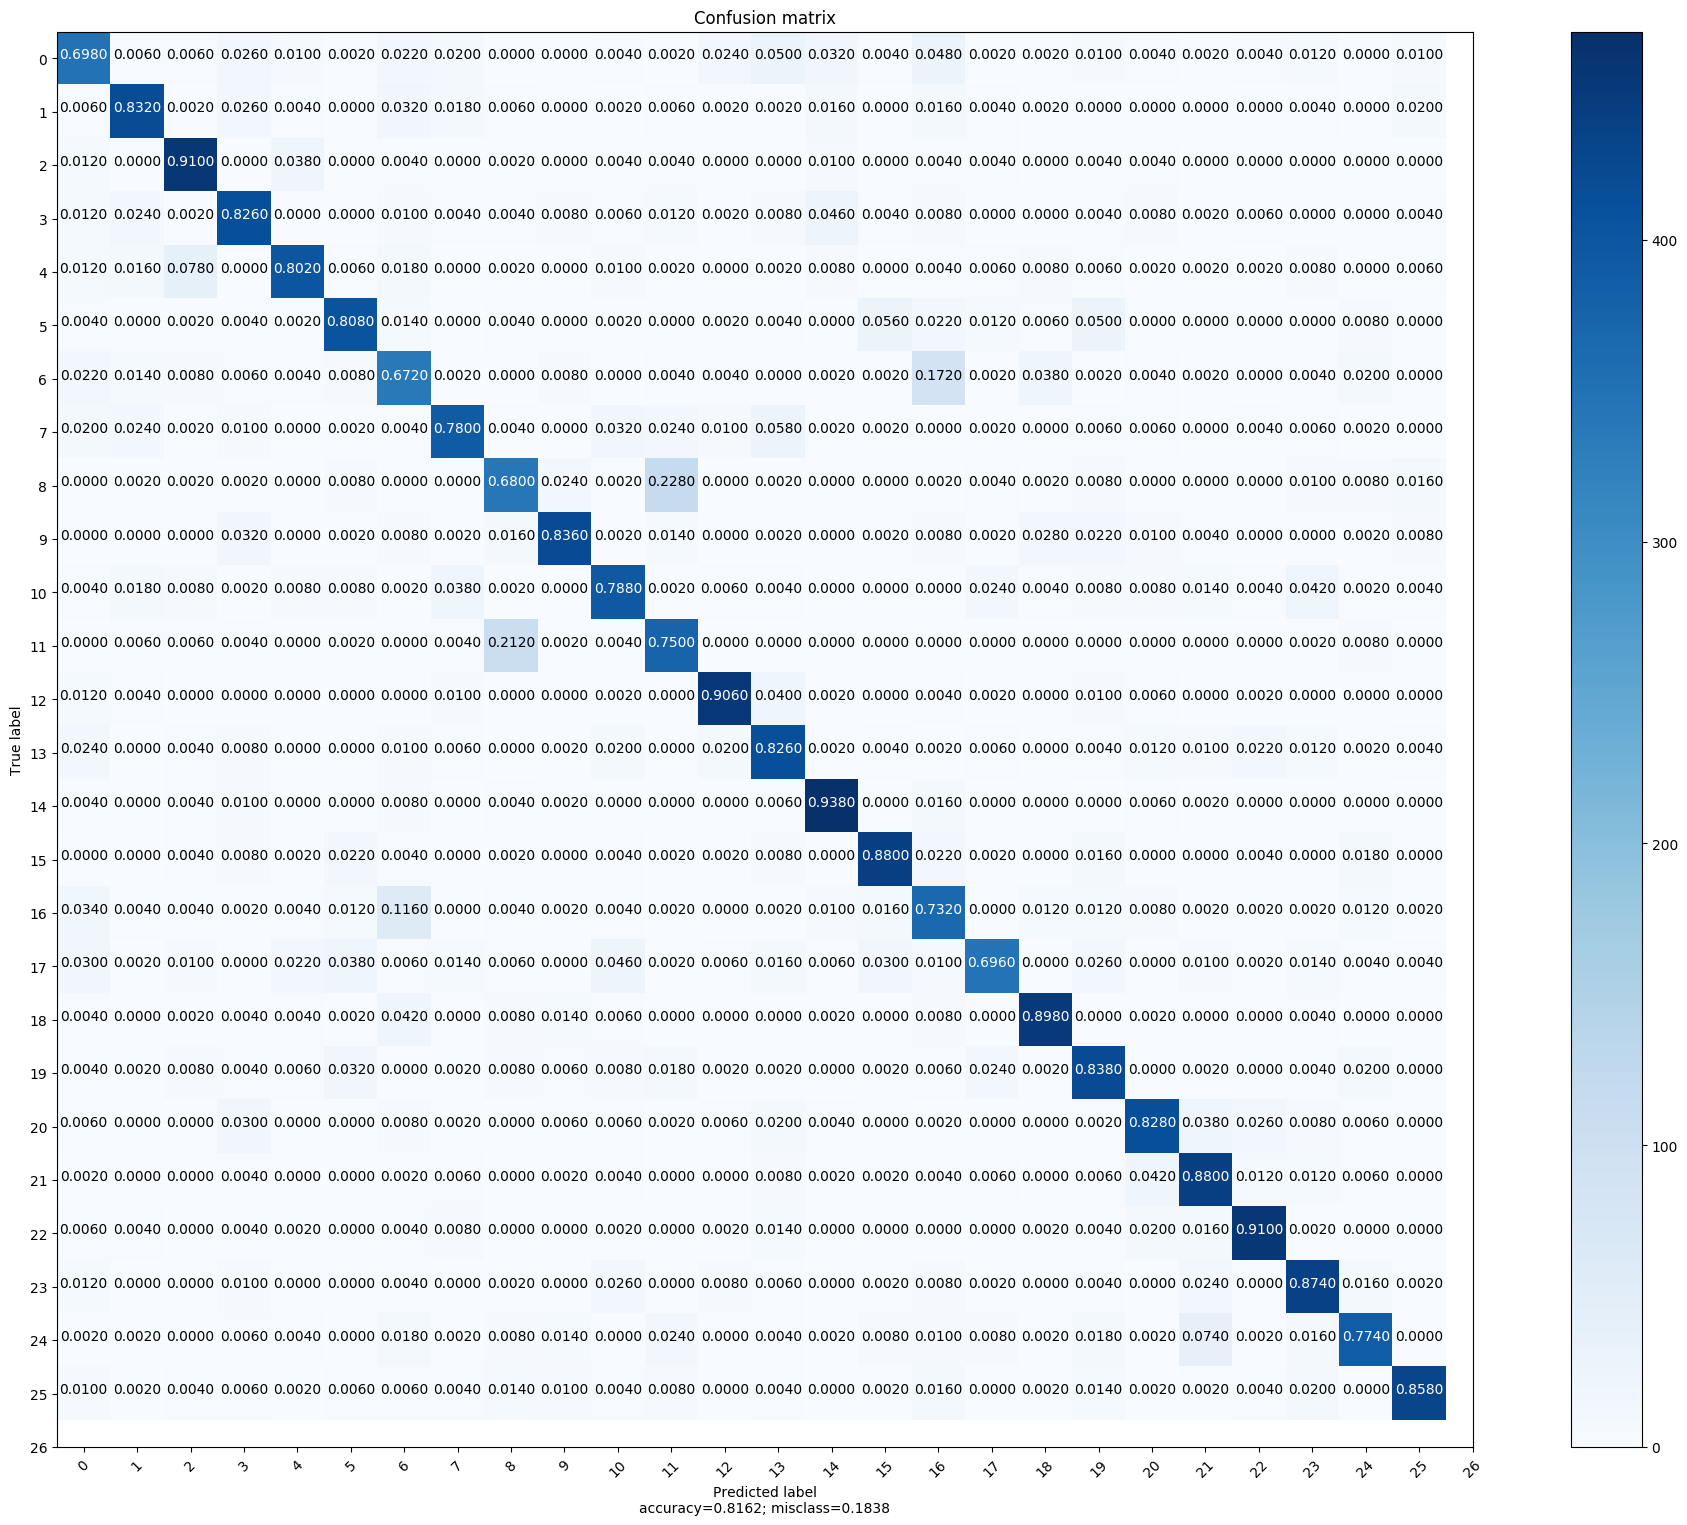

In [37]:
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, linear_model.predict_classes(test_images)),
                      target_names=np.arange(0, 27),
                      normalize=True)

Провизуализируем веса первого скрытого слоя (который связан с входным)

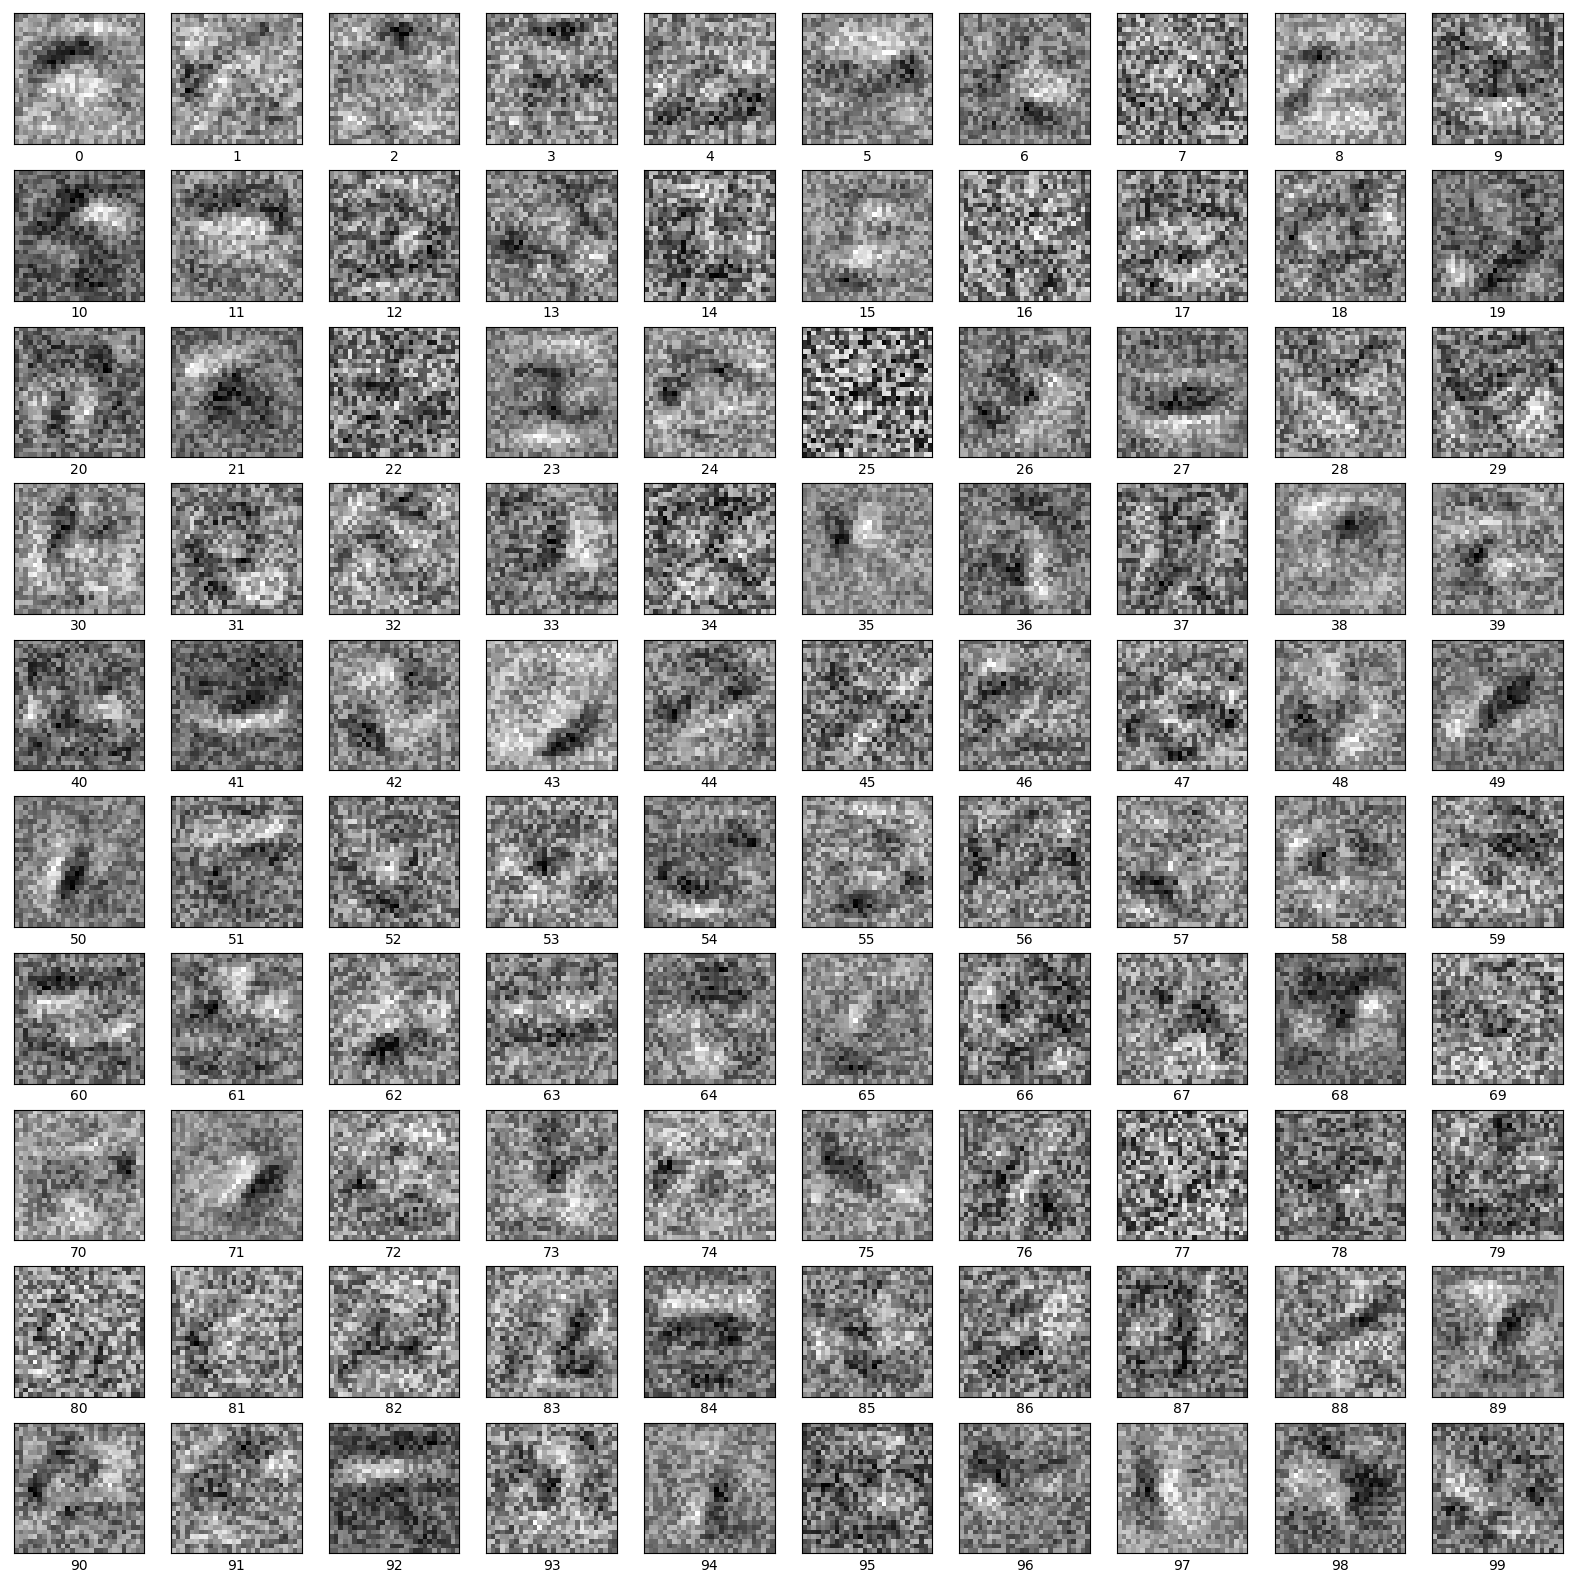

In [38]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(linear_model.get_layer(index=1).get_weights()[0][:, i].reshape((28, 28)).T, cmap='gray_r')
    plt.xlabel(i)
    plt.grid(False)

plt.show()

Веса, связывающие скрытый слой с входным, для класса 5

In [39]:
df = pd.DataFrame(linear_model.get_layer(index=3).get_weights()[0][:,4].reshape(10,10).round(3))
df.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,0.598,-0.442,-0.184,0.292,-0.062,-0.032,0.001,-0.316,-0.001,-0.249
1,-0.166,0.149,-0.102,0.257,0.057,-0.16,-0.061,0.299,-0.281,-0.151
2,0.357,0.081,0.197,0.043,0.177,0.139,-0.057,-0.181,-0.054,-0.143
3,0.11,-0.023,0.176,0.02,-0.148,-0.239,0.22,-0.021,-0.335,-0.07
4,0.116,-0.555,0.087,0.14,-0.06,0.036,-0.259,-0.071,0.227,0.042
5,0.147,0.008,-0.132,0.031,-0.095,0.18,-0.24,-0.047,0.053,-0.288
6,-0.339,0.025,-0.238,-0.06,-0.287,0.318,0.063,-0.447,-0.296,-0.192
7,0.204,0.057,0.181,0.061,-0.247,-0.233,0.029,-0.113,0.027,0.206
8,-0.249,0.125,-0.029,0.052,0.341,-0.04,0.205,0.329,-0.318,0.713
9,-0.063,-0.302,0.405,-0.299,0.491,-0.05,-0.034,-0.128,0.429,0.284


In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros'),  # скрытый слой из 100 нейронов
        Dense(27, activation='softmax', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.1), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [42]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
65000/65000 [==============================] - 5s 73us/step - loss: 0.9937 - acc: 0.7086
Epoch 2/10
65000/65000 [==============================] - 5s 75us/step - loss: 0.5702 - acc: 0.8291
Epoch 3/10
65000/65000 [==============================] - 5s 71us/step - loss: 0.4681 - acc: 0.8571
Epoch 4/10
65000/65000 [==============================] - 4s 65us/step - loss: 0.4175 - acc: 0.8708
Epoch 5/10
65000/65000 [==============================] - 4s 67us/step - loss: 0.3821 - acc: 0.8796
Epoch 6/10
65000/65000 [==============================] - 4s 67us/step - loss: 0.3573 - acc: 0.8874
Epoch 7/10
65000/65000 [==============================] - 4s 66us/step - loss: 0.3378 - acc: 0.8931
Epoch 8/10
65000/65000 [==============================] - 4s 65us/step - loss: 0.3205 - acc: 0.8983
Epoch 9/10
65000/65000 [==============================] - 4s 65us/step - loss: 0.3051 - acc: 0.9022
Epoch 10/10
65000/65000 [==============================] - 4s 67us/step - loss: 0.2949 - acc: 0.9044

In [43]:
test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

13000/13000 [==============================] - 0s 33us/step
Test accuracy: 0.8697692307692307 
Test loss: 0.4330670485496521


if optimizer=SGD(lr=0.01):

Test accuracy: 0.80915385 
Test loss: 0.6538339856954721

if optimizer=SGD(lr=0.001):

Test accuracy: 0.6463846 
Test loss: 1.2411210293403039

if optimizer=SGD(lr=0.1):

Test accuracy: 0.8550769 
Test loss: 0.46781429701585037

Изменим  оптимайзер на RMSprop:

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        Dense(100, activation='relu', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros'),  # скрытый слой из 100 нейронов
        Dense(27, activation='softmax', 
              kernel_initializer='glorot_uniform', bias_initializer='zeros') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=RMSprop(lr=0.1), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [62]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=1)
test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

Epoch 1/10
65000/65000 [==============================] - 7s 107us/step - loss: 15.4930 - acc: 0.0384
Epoch 2/10
65000/65000 [==============================] - 6s 91us/step - loss: 15.4982 - acc: 0.0385
Epoch 3/10
65000/65000 [==============================] - 6s 90us/step - loss: 15.4982 - acc: 0.0385
Epoch 4/10
65000/65000 [==============================] - 6s 86us/step - loss: 15.4982 - acc: 0.0385
Epoch 5/10
65000/65000 [==============================] - 6s 88us/step - loss: 15.4982 - acc: 0.0385
Epoch 6/10
65000/65000 [==============================] - 6s 87us/step - loss: 15.4982 - acc: 0.0385
Epoch 7/10
65000/65000 [==============================] - 6s 85us/step - loss: 15.4982 - acc: 0.0385
Epoch 8/10
65000/65000 [==============================] - 6s 92us/step - loss: 15.4982 - acc: 0.0385
Epoch 9/10
65000/65000 [==============================] - 6s 86us/step - loss: 15.4982 - acc: 0.0385
Epoch 10/10
13000/13000 [==============================] - 1s 68us/step
Test accuracy: 0.0

Test accuracy: 0.038461538461538464 
Test loss: 15.498170407221867

Все очень и очень печально :С

Больше так делать не будем.

Добавим 3 слой:

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Activation

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(100, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50, 
              kernel_regularizer=regularizers.l2(0.00)),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=SGD(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [46]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 1s 39us/step

Test accuracy: 0.8704615384615385 
Test loss: 0.41203949482624347 

CPU times: user 1min 12s, sys: 3.7 s, total: 1min 16s
Wall time: 47.7 s


if optimizer=SGD(lr=0.01):

Test accuracy: 0.87346154 
Test loss: 0.40630391981051517 

if optimizer=SGD(lr=0.1):

Test accuracy: 0.8726154 
Test loss: 0.39360170340538025 


if optimizer=SGD(lr=0.001):

Test accuracy: 0.73615384 
Test loss: 0.9568838689510639 

With using optimizers

In [0]:
from tensorflow.keras.optimizers import RMSprop, Adam

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [49]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 1s 46us/step

Test accuracy: 0.8906923076923077 
Test loss: 0.34892192524213056 

CPU times: user 1min 44s, sys: 6.01 s, total: 1min 50s
Wall time: 1min 7s


If optimizer=Adam(lr=0.0001): 

Test accuracy: 0.85992306
Test loss: 0.4521610068357908 

if optimizer=Adam(lr=0.01):

Test accuracy: 0.89484614 
Test loss: 0.33572903247979974 

if optimizer=Adam(lr=0.1)

Test accuracy: 0.832 
Test loss: 0.5575880073033846 


Попробуем изменить количество нейронов:

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(250),  # скрытый слой из 250 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [51]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 1s 64us/step

Test accuracy: 0.8983076923076924 
Test loss: 0.3291689691085082 

CPU times: user 3min 10s, sys: 12.2 s, total: 3min 23s
Wall time: 2min 1s


При изменении скрытых слоев на 250 и 100 нейронов:

Test accuracy: 0.9042308 
Test loss: 0.31886855688003396 

Попробуем изменить количество скрытых слоев. Добавим еще один скрытый слой.

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(250),  # скрытый слой из 250 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(100),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(50),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [64]:
%%time
ann_model.fit(train_images, train_labels, epochs=10, verbose=0)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 1s 94us/step

Test accuracy: 0.9036923076923077 
Test loss: 0.30748217854591514 

CPU times: user 3min 39s, sys: 14.1 s, total: 3min 53s
Wall time: 2min 21s


Test accuracy: 0.9036923076923077 
Test loss: 0.30748217854591514 

Добавим dropout дабы избежать переобучения. Посмотрим, что выйдет: 

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(1000),  # скрытый слой из 100 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(500),  # скрытый слой из 50 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=Adam(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [60]:
%%time
ann_model.fit(train_images, train_labels, epochs=50, verbose=1)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

Epoch 1/50
65000/65000 [==============================] - 55s 851us/step - loss: 1.0899 - acc: 0.6771
Epoch 2/50
65000/65000 [==============================] - 54s 830us/step - loss: 0.8271 - acc: 0.7493
Epoch 3/50
65000/65000 [==============================] - 53s 823us/step - loss: 0.7543 - acc: 0.7672
Epoch 4/50
65000/65000 [==============================] - 53s 819us/step - loss: 0.7084 - acc: 0.7807
Epoch 5/50
65000/65000 [==============================] - 53s 821us/step - loss: 0.6747 - acc: 0.7907
Epoch 6/50
65000/65000 [==============================] - 54s 835us/step - loss: 0.6441 - acc: 0.7984
Epoch 7/50
65000/65000 [==============================] - 53s 821us/step - loss: 0.6224 - acc: 0.8062
Epoch 8/50
65000/65000 [==============================] - 54s 827us/step - loss: 0.6122 - acc: 0.8094
Epoch 9/50
65000/65000 [==============================] - 54s 826us/step - loss: 0.5902 - acc: 0.8134
Epoch 10/50
65000/65000 [==============================] - 54s 826us/step - loss: 

Test accuracy: 0.9083846153846153 
Test loss: 0.27585744639543386 

Изменим оптимайзер на RMSprop:

In [0]:
ann_model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # перевод данных в вектор размерности 28*28=784 (построчно)
        
        Dense(500),  # скрытый слой из 500 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(250),  # скрытый слой из 250 нейронов
        BatchNormalization(), 
        Activation('relu'),
        Dropout(0.5),
        
        Dense(27, activation='softmax') # выходной слой из 27 нейронов по числу классов
    ]
)

ann_model.compile(optimizer=RMSprop(lr=0.01), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [66]:
%%time
ann_model.fit(train_images, train_labels, epochs=50, verbose=1)

test_loss, test_acc = ann_model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

Epoch 1/50
65000/65000 [==============================] - 25s 392us/step - loss: 1.3095 - acc: 0.6263
Epoch 2/50
65000/65000 [==============================] - 23s 360us/step - loss: 1.1158 - acc: 0.6876
Epoch 3/50
65000/65000 [==============================] - 24s 363us/step - loss: 1.0950 - acc: 0.6968
Epoch 4/50
65000/65000 [==============================] - 23s 361us/step - loss: 1.1048 - acc: 0.6951
Epoch 5/50
65000/65000 [==============================] - 23s 361us/step - loss: 1.1124 - acc: 0.6939
Epoch 6/50
65000/65000 [==============================] - 23s 359us/step - loss: 1.1260 - acc: 0.6883
Epoch 7/50
65000/65000 [==============================] - 23s 361us/step - loss: 1.1272 - acc: 0.6878
Epoch 8/50
65000/65000 [==============================] - 24s 362us/step - loss: 1.1506 - acc: 0.6791
Epoch 9/50
65000/65000 [==============================] - 24s 362us/step - loss: 1.1610 - acc: 0.6762
Epoch 10/50
65000/65000 [==============================] - 23s 354us/step - loss: 

Test accuracy: 0.7096153846153846 
Test loss: 0.9856200860830454 


Попробуем создать сверточную нейронную сеть и посмотреть, как она будет себя показывать на тестовых данных:

In [0]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.models import Sequential

In [0]:
cnn_model = Sequential(
    [
        Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(), #Flattening(сглаживание?) 2D массивов для полностью связанных слоев
        
        Dense(250), # скрытый слой из 250 нейронов
        Activation('relu'),
        Dropout(0.3),
        
        Dense(100), # скрытый слой из 100 нейронов
        Activation('relu'),
        Dropout(0.3),
        
        Dense(27), # выходной слой из 27 нейронов по числу классов
        Activation('softmax')
    ]
)

cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [112]:
%%time

cnn_model.fit(train_images.reshape(65000, 28, 28, 1), train_labels, epochs=25, verbose=1)

Epoch 1/25
65000/65000 [==============================] - 79s 1ms/step - loss: 0.9700 - acc: 0.7036
Epoch 2/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.5269 - acc: 0.8331
Epoch 3/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.4282 - acc: 0.8612
Epoch 4/25
65000/65000 [==============================] - 77s 1ms/step - loss: 0.3723 - acc: 0.8782
Epoch 5/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.3409 - acc: 0.8884
Epoch 6/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.3127 - acc: 0.8951
Epoch 7/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.2908 - acc: 0.9015
Epoch 8/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.2826 - acc: 0.9044
Epoch 9/25
65000/65000 [==============================] - 77s 1ms/step - loss: 0.2667 - acc: 0.9087
Epoch 10/25
65000/65000 [==============================] - 76s 1ms/step - loss: 0.2548 - acc: 0.9122

In [113]:
test_loss, test_acc = cnn_model.evaluate(test_images.reshape(13000, 28, 28, 1), test_labels)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss, '\n')

13000/13000 [==============================] - 5s 360us/step

Test accuracy: 0.9176153846153846 
Test loss: 0.30082153021716157 



If dropout(0.3) and number of epoch == 10:

Test accuracy: 0.917923076923077 
Test loss: 0.26045440377180396 

if dropout(0.4) and number of epoch == 25:

Test accuracy: 0.9034615384615384 
Test loss: 0.3367046816142706 

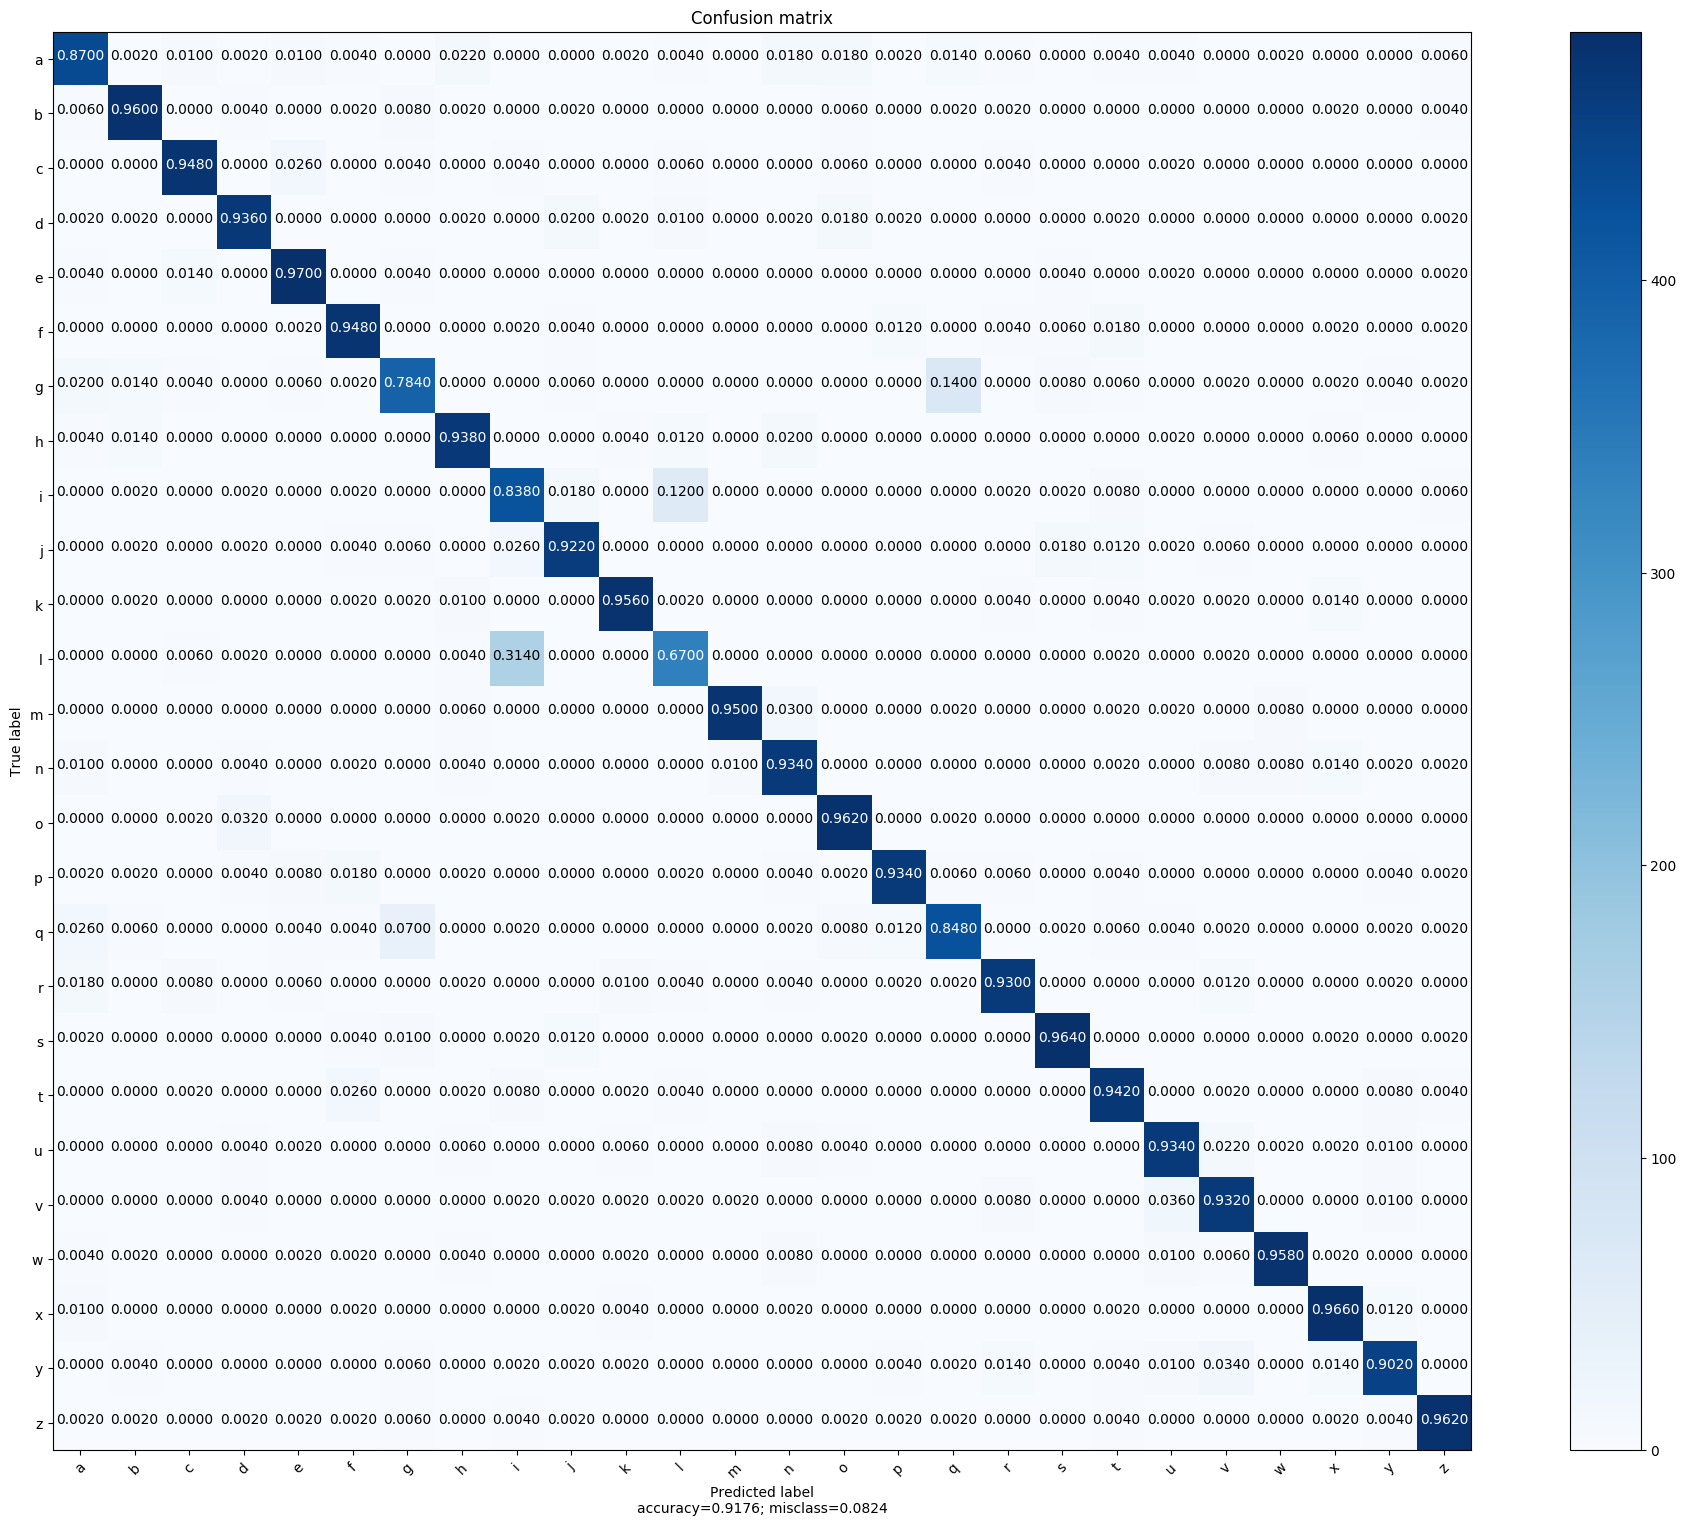

In [115]:
AL = 'abcdefghijklmnopqrstuvwxyz'
plot_confusion_matrix(cm=metrics.confusion_matrix(test_labels, cnn_model.predict_classes(test_images.reshape(13000, 28, 28, 1))),
                      target_names=AL,
                      normalize=True)

Наилучшая модель получилась - свертка. Точность - 91%

Пары букв, которые чаще всего путаются между собой:

L - I

O - D

Q - G

Q - A

T - F

J - I

V - U

Y - V

P - F

E - C




Буквы с лучшим процентом детекции:

E - 97%

Y - 96.6%

Буквы с худшим процентом:

L - 67%

G - 78.4%

Первая буква моей фамилии - K - 95.6%. Чаще всего ее путают с H.


(28, 28)


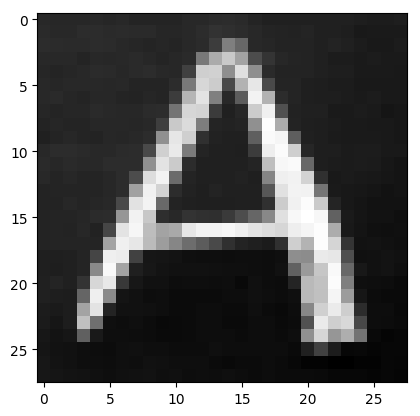

array([1])

In [149]:
import matplotlib.image as mpimg 

#uploaded = files.upload()

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

my_img = np.empty(shape=(5,28,28)) 

#img_a = mpimg.imread(io.BytesIO(uploaded['A.png']))
img_a = mpimg.imread('A (2).png')


img_a = 1 - img_a
gray=rgb2gray(img_a) 
plt.imshow(gray, cmap='gray')
print(gray.shape)
plt.show()

cnn_model.predict_classes(gray.T.reshape(1,28,28,1))

(28, 28)


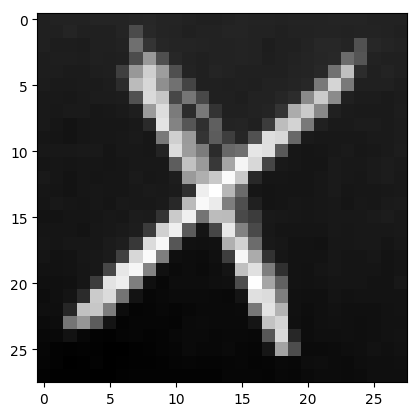

array([24])

In [150]:
import matplotlib.image as mpimg 

#uploaded = files.upload()

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

my_img = np.empty(shape=(5,28,28)) 

#img_x = mpimg.imread(io.BytesIO(uploaded['X.png']))
img_x = mpimg.imread('X.png')

img_x = 1 - img_x
gray=rgb2gray(img_x) 
plt.imshow(gray, cmap='gray')
print(gray.shape)
plt.show()

cnn_model.predict_classes(gray.T.reshape(1,28,28,1))

(28, 28)


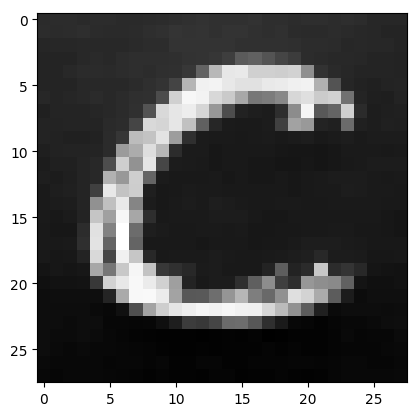

array([3])

In [143]:
import matplotlib.image as mpimg 

#uploaded = files.upload()

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

my_img = np.empty(shape=(5,28,28)) 

#img_c = mpimg.imread(io.BytesIO(uploaded['C.png']))
img_c = mpimg.imread('C.png')

img_c = 1 - img_c
gray=rgb2gray(img_c) 
plt.imshow(gray, cmap='gray')
print(gray.shape)
plt.show()

cnn_model.predict_classes(gray.T.reshape(1,28,28,1))

(28, 28)


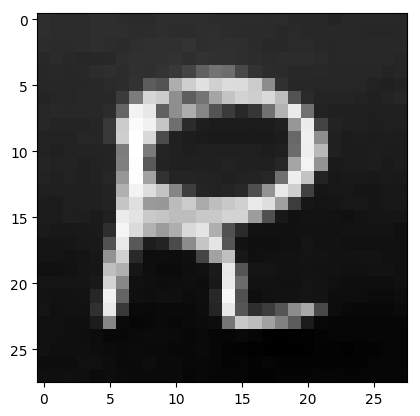

array([18])

In [144]:
import matplotlib.image as mpimg 

#uploaded = files.upload()

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

my_img = np.empty(shape=(5,28,28)) 

#img_r = mpimg.imread(io.BytesIO(uploaded['R.png']))
img_r = mpimg.imread('R.png')

img_r = 1 - img_r
gray=rgb2gray(img_r) 
plt.imshow(gray, cmap='gray')
print(gray.shape)
plt.show()

cnn_model.predict_classes(gray.T.reshape(1,28,28,1))

(28, 28)


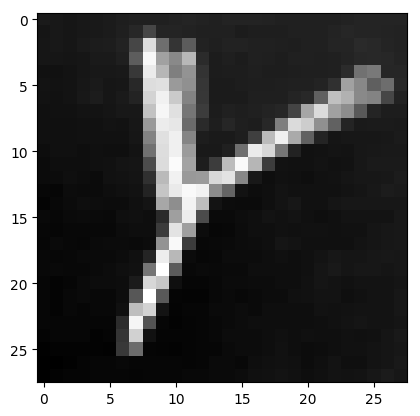

array([18])

In [145]:
import matplotlib.image as mpimg 

#uploaded = files.upload()

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

my_img = np.empty(shape=(5,28,28)) 

#img_y = mpimg.imread(io.BytesIO(uploaded['Y.png']))
img_y = mpimg.imread('Y.png')
img_y = 1 - img_y
gray=rgb2gray(img_y) 
plt.imshow(gray, cmap='gray')
print(gray.shape)
plt.show()

cnn_model.predict_classes(gray.T.reshape(1,28,28,1))